# musicntwrk - basic functionalities overview

 A python library for pitch class set and rhythmic sequences classification and manipulation,
 the generation of networks in generalized musical spaces, and the sonification of arbitrary data
 See documentation at www.musicntwrk.com 

 Copyright (C) 2018,2019,2020 Marco Buongiorno Nardelli
 http://www.materialssoundmusic.com, mbn@unt.edu

 This file is distributed under the terms of the
 GNU General Public License. See the file `License'
 in the root directory of the present distribution,
 or http://www.gnu.org/copyleft/gpl.txt .

For a high quality graphics representation of networks, node and edge files can be written to disk in csv format and directly imported in visualization programs like Gephi (www.gephi.org)

To display musicxml in notation format a notation app should be installed (see for instance www.musescore.org) and should be defined in music21 preferences (see https://web.mit.edu/music21/doc/usersGuide/usersGuide_08_installingMusicXML.html)

#### Installation

pip install musicntwrk  
or  
pip install musicntwrk[with_MPI]  
(if there is a pre-existing installation of MPI, pip will automatically install the mpi4pi wrapper)

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import re, sys, os, time
from musicntwrk import musicntwrk
from musicntwrk.musicntwrk import PCSet, MIDIset
from musicntwrk.plotting.drawNetwork import drawNetwork
from musicntwrk.plotting.drawNetwork3D import drawNetwork3D
mk = musicntwrk.musicntwrk(TET=12)

import itertools as iter
import numpy as np

ModuleNotFoundError: No module named 'plotly'

#### Anaysis of J.S. Bach chorale from BWV66
musicxml file from music21 corpus

In [4]:
import music21 as m21
bachChorale = m21.corpus.parse('bwv332').metadata.corpusFilePath
# bachChorale = '/Users/marco/Downloads/test.mid'
seq,_,dscore = mk.dictionary(space='score',scorefil=bachChorale,music21=True,show=True)
nodes,edges,_,_,_,_,_ = mk.network(space='score',seq=seq,ntx=True,general=False,distance='euclidean',
                                   grphtype='directed')
drawNetwork(nodes=nodes,edges=edges,grphtype='directed',colormap='Pastel1')

NameError: name 'mk' is not defined

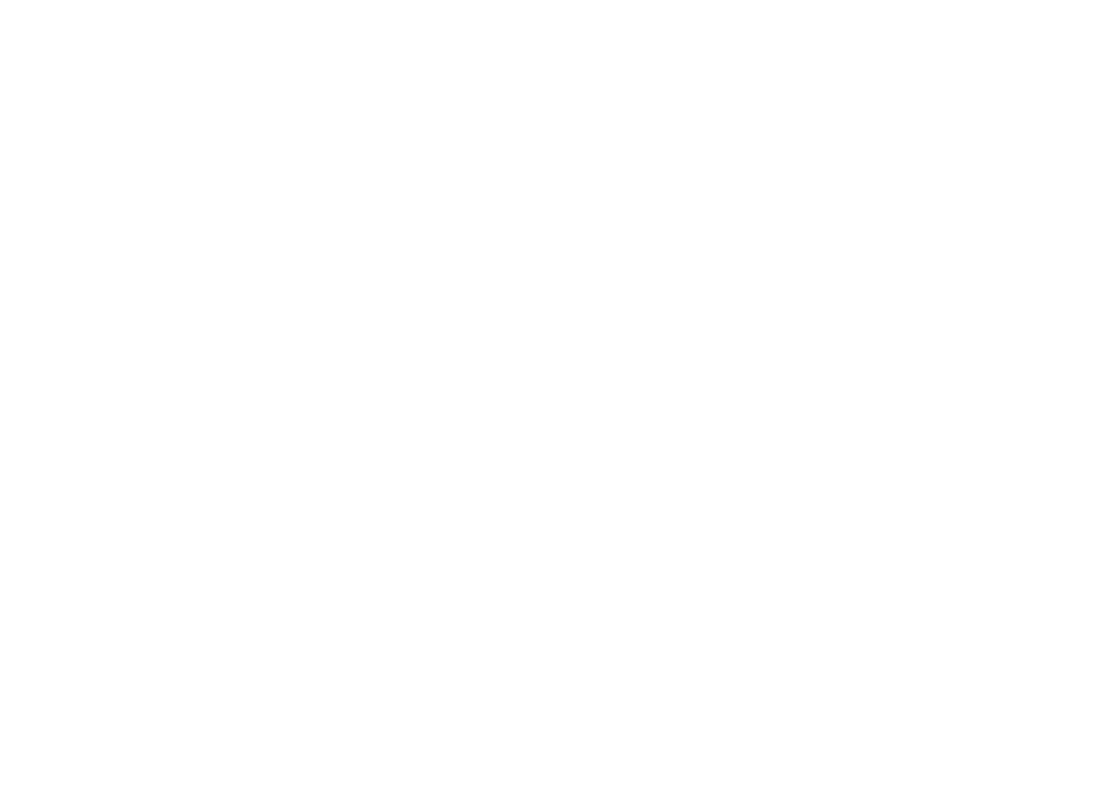

In [4]:
drawNetwork3D(nodes,edges,arrow=True,asize=0.3)

In [17]:
nodes.to_csv('nodes.csv')
edges.to_csv('edges.csv')

In [5]:
from musicntwrk.utils.score2vLead import score2vLead
from musicntwrk.plotting.drawNetworkViz import drawNetworkViz

In [6]:
nodict = score2vLead(nodes,dscore)

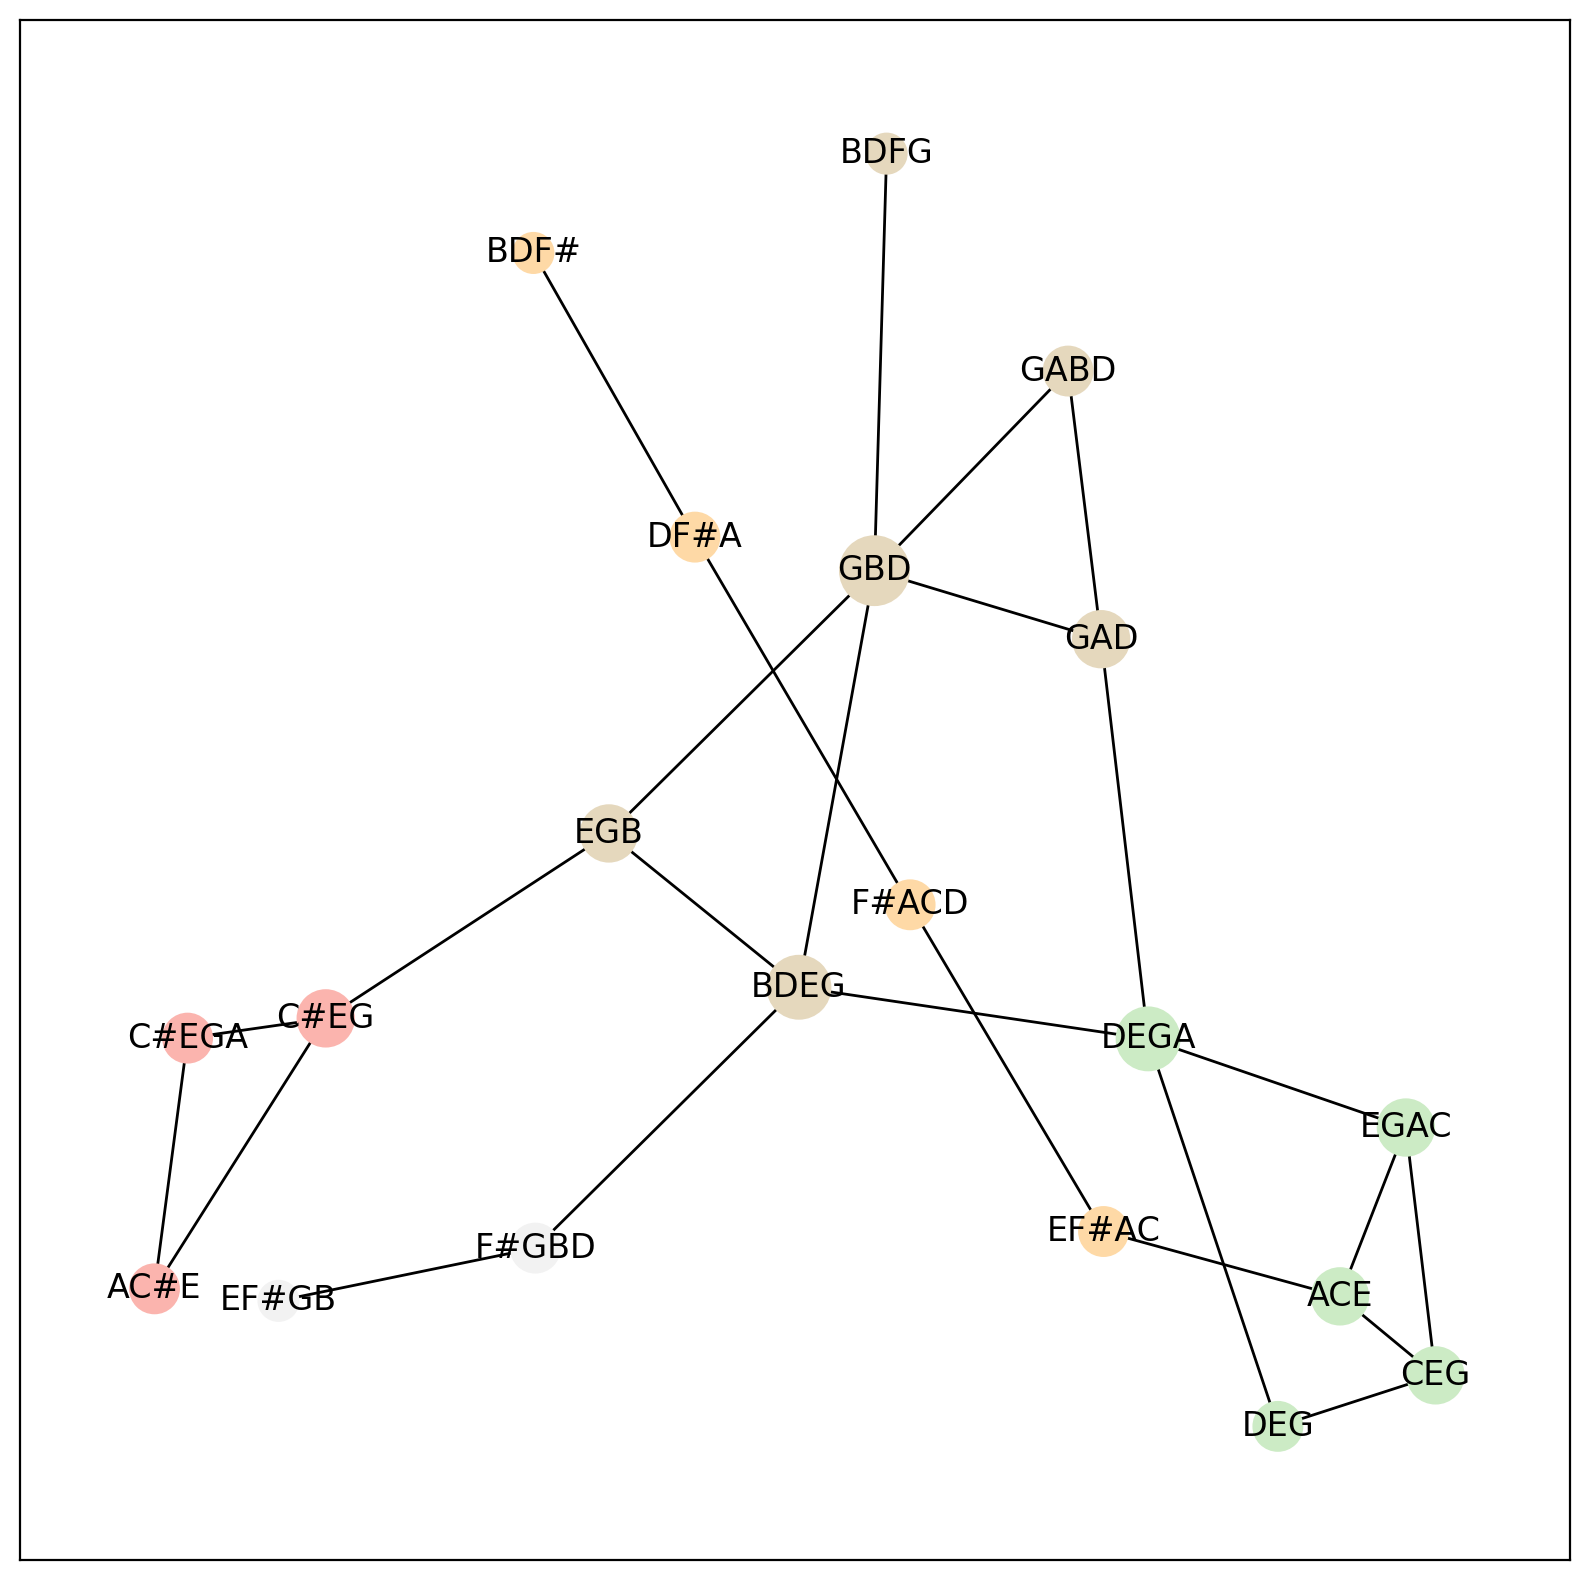

In [7]:
nodesop, edgesop = mk.network(space='vLead',vector=False,ops=True,name=['O(2)'],
                          dictionary=nodict,distance='euclidean',prob=1,write=False,pcslabel=True)
drawNetwork(nodes=nodesop,edges=edgesop,grphtype='undirected',colormap='Pastel1')

In [8]:
nodesop.to_csv('nodesop.csv')
edgesop.to_csv('edgesop.csv')

In [9]:
drawNetworkViz(nodes,[edges,edgesop],engine='neato',strict=True)

In [10]:
from musicntwrk.plotting.plotOpsHistogram import plotOpsHistogram

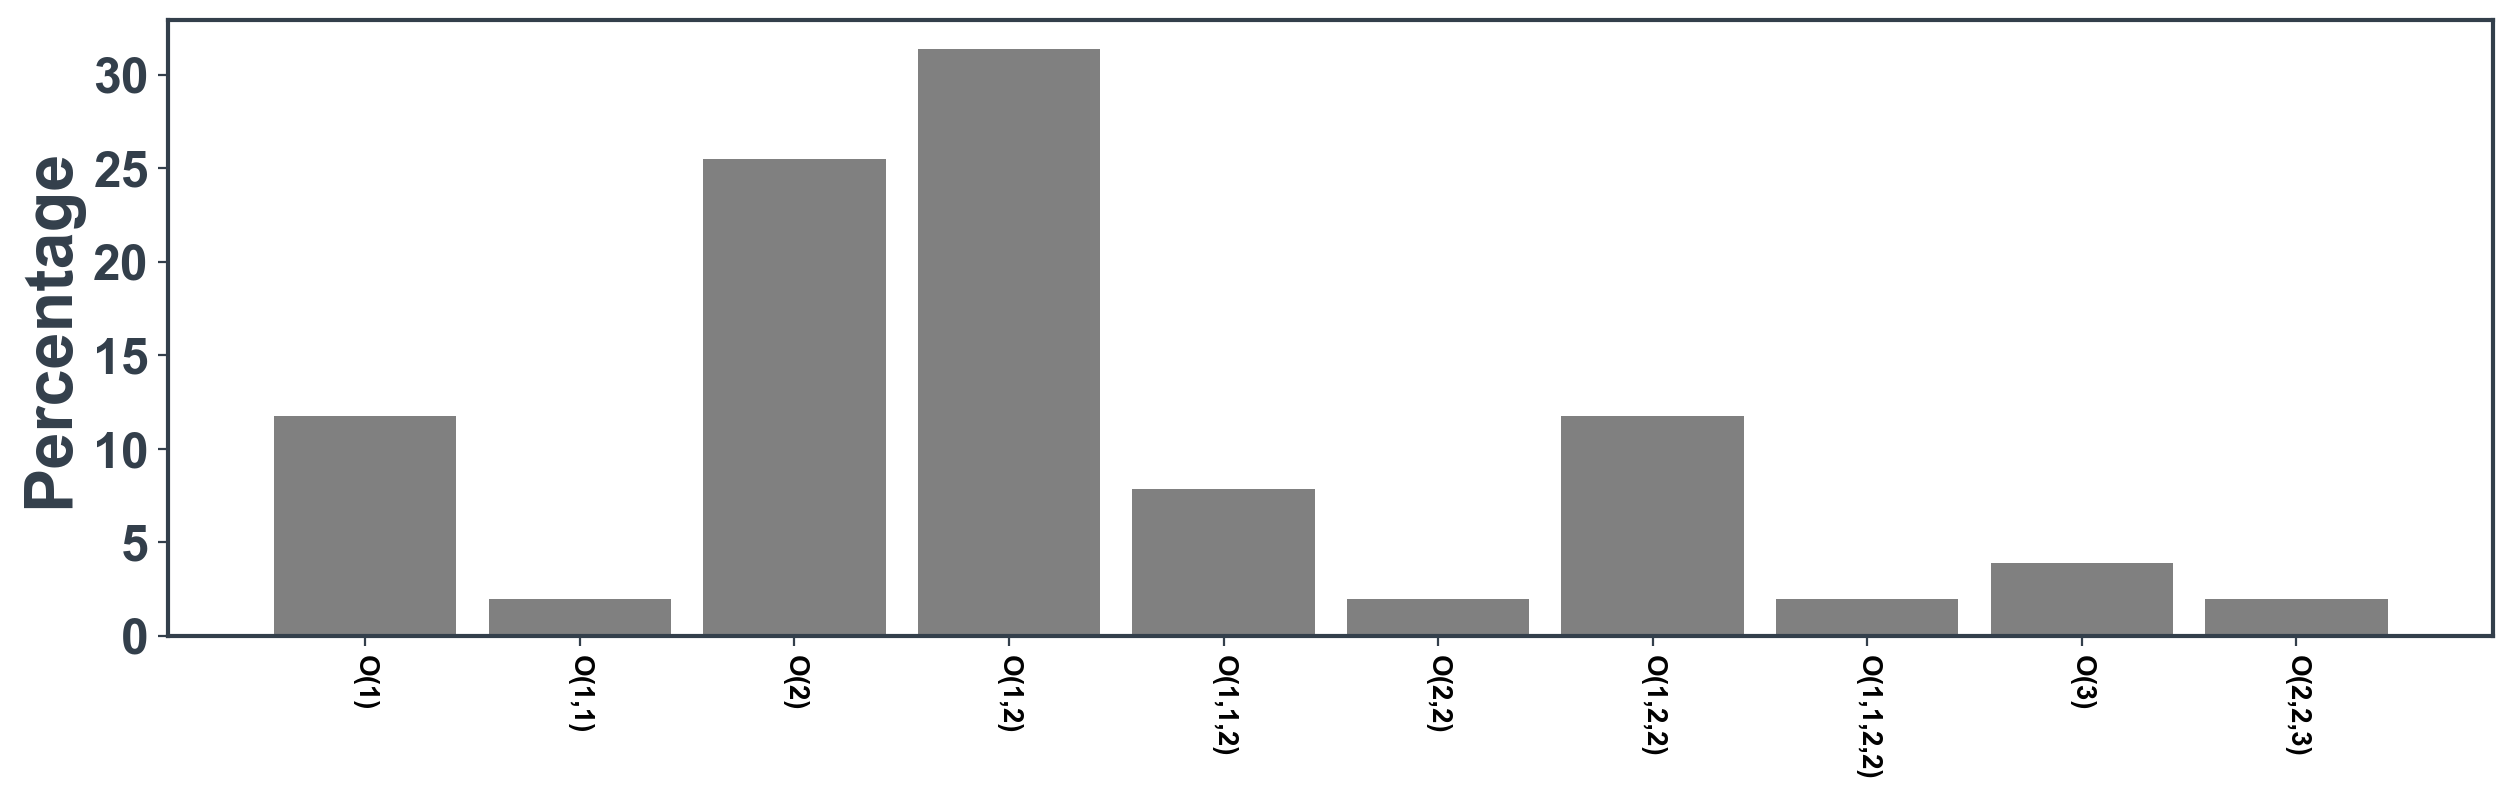

In [11]:
_,_ = plotOpsHistogram(edges)

# Exercise

Explore other score networks from the corpus of scores included in music21
See music21 documentation or try changing the numbers in the name in the line:

    bachChorale = m21.corpus.parse('bwvXXX').metadata.corpusFilePath

Bach wrote 377 chorales!